<a href="https://colab.research.google.com/github/Flychuban/Image-Classifier-Deep-Learning/blob/main/ImageClassifierDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import os

In [2]:
# Avoid OOM error
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr

In [4]:
data_dir = os.path.join('drive', 'MyDrive', 'ImageClassifierDeepLearning', 'data')
print(data_dir)
print('/content/drive/MyDrive/ImageClassifierDeepLearning/data')

drive/MyDrive/ImageClassifierDeepLearning/data
/content/drive/MyDrive/ImageClassifierDeepLearning/data


In [5]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [6]:
# Remove corrupted images
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print(f"Image not in ext list {image_path}")
        os.remove(image_path)
    except Exception as e:
      print(f"Issue with image {image_path}")

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
# Building data pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 177 files belonging to 2 classes.


In [14]:
# Converting data from generatoe to iterator
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

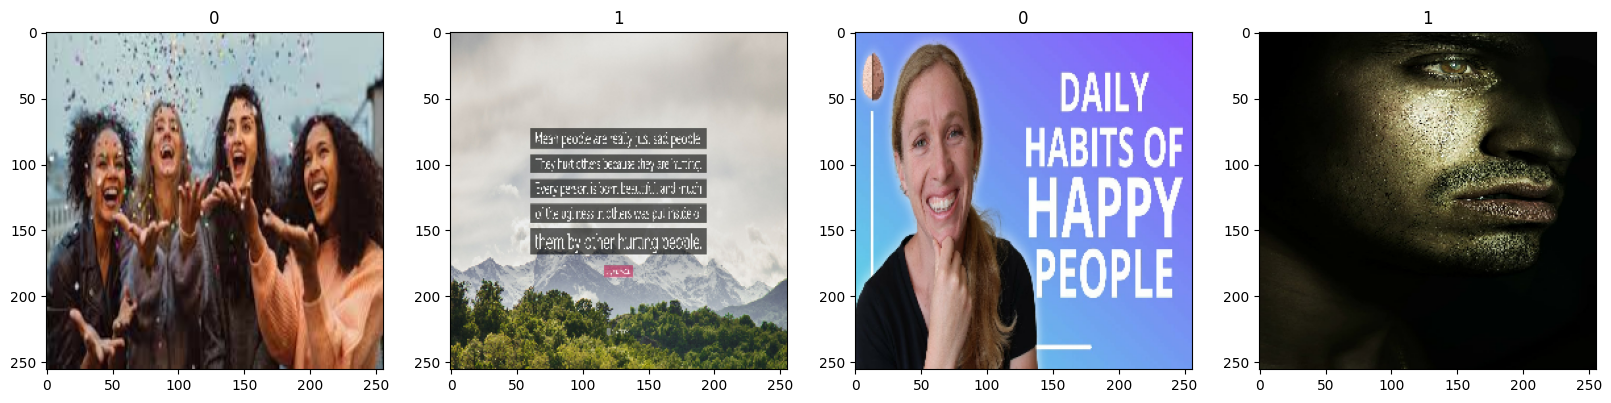

In [17]:
# Checking image labels
# 0-Happy 1-Sad
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])